# Broadband Customer Base Churn Classification

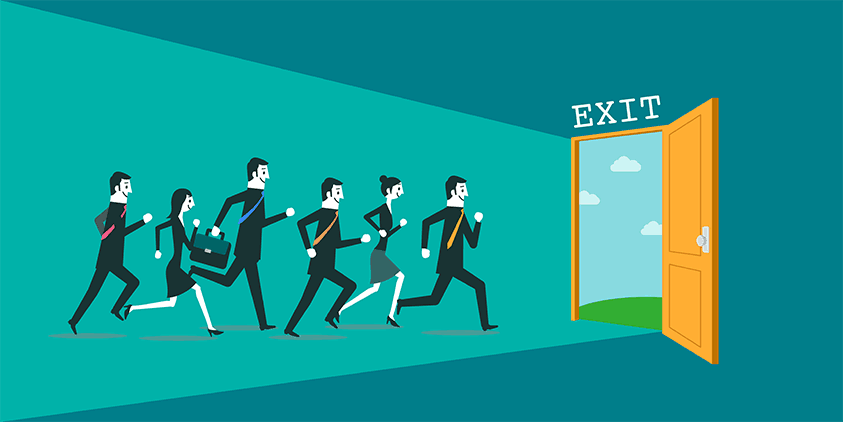

Companies that offer broadband internet operate in a very competitive market all over the world. It is laboriously difficult to examine and comprehend the factors that led a customer to choose to change insurance providers when millions of customers' various types of data have been collected.

> Churn rate is the number of losing customers or canceling members or subscribers. The extent to which a company manages to retain customers is an indication of customer satisfaction (or dissatisfaction). Churn rates are usually expressed in an absolute number or percentage of subscribers dropping out per month or per year.

Broadband internet provider firms rely on data to analyze customer behavior to prevent retention in a sector where client acquisition and retention are equally vital and the former is a more expensive procedure. One of the main issues facing the internet sector is churn. Knowing in advance whether a customer might switch provides broadband internet provider companies the chance to develop methods to stop it from really happening. Therefore, using machine learning to develop proactive marketing efforts that target clients who are about to lose is a good idea.

### Research questions

The aim of the study is to answer the below research questions:

- What are the main reasons that explains customer churn happens?
- How does the rate evolve with time?
- How much time does a custumer wait before churning?
- What kind of contracts know more churn?
- Does the contract expiry date influence churn?
- How is the churn rate affected by the monthly revenue of customers?
- How churn vary with the number of complaint calls done by customer every month?
- Does the bandwith of a customer affect churn?
- Does churn change whether broadband customer has taken a phone service seaprately or not?

### About the dataset

This is a data set of broadband service provider. It represents monthly bills of each customer with their Id, contract tenure, churned or not at yet etc.



### Features

The various features of the dataset are explained below:

1. *image*: The billing month and year
2. *newacct_no*: A unique customer id
3. *line_stat*: Ignorable columns (Use them in case you find a corelation, but mostly they can be ignored)
4. *bill_cycl*: Ignorable columns
5. *serv_type*: Ignorable columns
6. *serv_code*: Ignorable columns
7. *tenure*: Number of months since the customer is in the system 
8. *effc_strt_date*: Contract start date
9. *effc_end_date*: Contract end date
10. *contract_month*: Contract type
11. *ce_expiry*: Contract expiry date, if expiry date is jan'19, and today is jan'2020, then ce_expiry is -12, if expiry date is jan'21, and today is.
12. *secured_revenue*: Monthly revenue
13. *bandwidth*: Internet bandwidth
14. *term_reas_code*: Contract termination reason code
15. *term_reas_desc*: Description of contract termination reason code
16. *complaint_cnt*: Number of complaint calls done by customer every month
17. *with_phone_service*: Whether broadband customer has taken a phone service seaprately or not.
18. *churn*: churned or not
19. *current_mth_churn*: The month where the customer is churned, let say customer got churned in june'19, and we have data from jan'19 to jan'20


---

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

---

## Exploratory Data Analysis

In [17]:
df = pd.read_csv("data/dataset.csv",low_memory=False)
print("There are {} observations for {} predictors.".format(df.shape[0],df.shape[1]))
df.head()

There are 510125 observations for 20 predictors.


,image,newacct_no,line_stat,bill_cycl,serv_type,serv_code,tenure,effc_strt_date,effc_end_date,contract_month,ce_expiry,secured_revenue,bandwidth,term_reas_code,term_reas_desc,complaint_cnt,with_phone_service,churn,current_mth_churn,Unnamed: 19
0,201801,70068143.001.000000062,AC,1,BBS,VS100DUN,202,06.03.2018 00:00:00,05.03.2021 00:00:00,36.0,13.0,178.0,100M,NaN,NaN,0,N,N,N,NaN
1,201801,70068143.003.000072630,AC,1,BBS,VS030F6R,35,01.03.2019 00:00:00,28.02.2021 00:00:00,24.0,13.0,1572.0,30M,NaN,NaN,0,N,N,N,NaN
2,201801,70071840.001.000000066,AC,1,BBS,EAXMXMFSRN1,202,01.10.2019 00:00:00,30.09.2021 00:00:00,24.0,20.0,290.0,10M,NaN,NaN,0,Y,N,N,NaN
3,201801,70071840.003.000060034,AC,1,BBS,VS100DUN,72,07.11.2018 00:00:00,06.11.2020 00:00:00,24.0,9.0,218.0,100M,NaN,NaN,0,Y,N,N,NaN
4,201801,70076500.001.000000073,AC,1,BBS,PF100FSR,202,01.05.2017 00:00:00,30.04.2019 00:00:00,24.0,-9.0,430.0,100M (FTTO),NaN,NaN,0,N,Y,N,NaN


In [3]:
df.isnull().sum()

image                      0
newacct_no                 0
line_stat                  0
bill_cycl                  0
serv_type                  0
serv_code                  0
tenure                     0
effc_strt_date          1937
effc_end_date           1937
contract_month          1937
ce_expiry               1937
secured_revenue            0
bandwidth                  0
term_reas_code        504602
term_reas_desc        504602
complaint_cnt              0
with_phone_service         0
churn                      0
current_mth_churn          0
Unnamed: 19           510123
dtype: int64

With the informations of the different columns and a quick analysis, some columns don't bring any informations and thus can be deleted.

In [4]:
print(df.bill_cycl.unique())
print(df.serv_type.unique())
print(df["Unnamed: 19"].unique())

[1]
['BBS']
[nan 'Y']


Since the three columns "bill_cycl", "serv_type" and "Unnamed: 19" don't bring any informations, I will delete them. The column "term_reas_desc" is redundant because it only describes the reason code, it can also be deleted.

In [18]:
df = df.drop(["bill_cycl","serv_type","Unnamed: 19","term_reas_desc"],axis=1)

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
image,510125.0,NaN,NaN,NaN,201857.993237,50.076142,201801.0,201807.0,201901.0,201907.0,201912.0
newacct_no,510125,27605,91112227.001.000044697,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
line_stat,510125,3,AC,494338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
serv_code,510125,288,VS100DUN,94144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,510125.0,NaN,NaN,NaN,60.700254,51.213282,0.0,18.0,45.0,95.0,225.0
effc_strt_date,508188,2085,01.08.2018 00:00:00,4185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
effc_end_date,508188,2348,31.07.2020 00:00:00,4325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contract_month,508188.0,NaN,NaN,NaN,24.916928,5.245176,0.0,24.0,24.0,24.0,120.0
ce_expiry,508188.0,NaN,NaN,NaN,7.390413,13.719428,-175.0,2.0,9.0,16.0,115.0
secured_revenue,510125.0,NaN,NaN,NaN,504.573587,1492.281865,-385.22,158.0,204.0,360.0,61161.29


In [28]:
df.complaint_cnt.unique()

array(['0', '1', '2', '3', '5', '4', ' customer/ user pass away', '7',
       '6'], dtype=object)

---

## What are the main reasons that explains customer churn happens?

It’s important to understand why customers leave in the first place. Let's study the main reasons customers churn.

Explanation of the different termination reason codes:
- *REV*: Relocate to non-coverage(w/prof)
- *CLB*: Closing Business
- *NET*: Network Problem
- *UFSS*: Unsatisfy Field Service Support
- *CUCO*: Downsizing / Cut cost
- *EXP*: Sales Plan Not Attractive
- *NU*: No Use
- *OT*: Overdue Termination: Involuntary termination
- *COVL3*: Coverage Issue: Low speed coverage 
- *COM15*: COM-Unsatisfy Service quality
- *COVL2*: Coverage Issue: Low speed coverage 
- *OTHS*: Others
- *BILP*: Billing Problem
- *UCSH*: Unsatisfy CS Hotline
- *LOSF*: Lack of Service Features
- *EXI*: Additional extra installation charge
- *PLR*: Parallel Run Order
- *COVL1*: Coverage Issue: Low speed coverage
- *COM10*: COM-Miss follow-Help Desk
- *CUSN2*: Customer Issue: No use
- *UEMS*: Unsatisfy Email Service
- *CUSB0*: Customer Issue: Bankruptcy
- *MGR*: Migration Order
- *TRM*: Termination
- *NCAP*: No capacity
- *NWQU*: Network quality

<AxesSubplot:xlabel='count', ylabel='term_reas_code'>

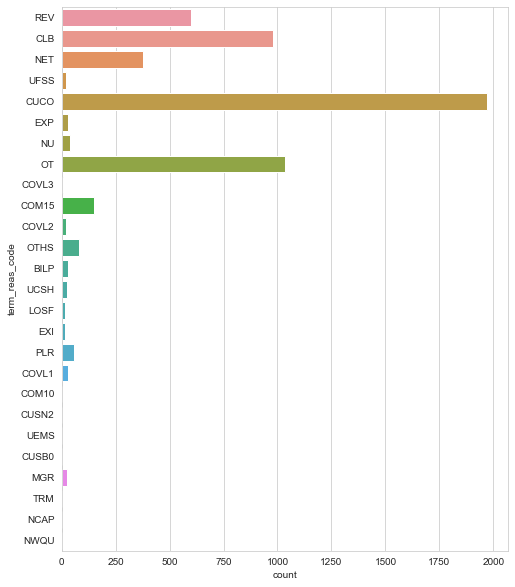

In [7]:
plt.figure(figsize = (8,10))
sns.countplot(y=df.term_reas_code)

In [8]:
tot_churn = len(df.loc[df.churn=='Y'])
tot_churn_with_reason = len(df.loc[(df.churn=='Y') & (df.term_reas_code.isnull() != False)])
percentage_reasons = tot_churn_with_reason/tot_churn
print("Only {}% of the reasons are given in the dataset. But it's enough to have a global view of the reasons that push customer to churn.".format(round(percentage_reasons*100)))

Only 92% of the reasons are given in the dataset. But it's enough to have a global view of the reasons that push customer to churn.


> 📌 From that plot, we can see five main reasons that explains the churn: "Downsizing / Cut cost", "Overdue Termination: Involuntary termination", "Closing Business", "Relocate to non-coverage(w/prof)" and "Network Problem".

> ⚠️ To prevent data leakage, this column will also be deleted since we won't have access to it when trying to predict churn.

### How does the rate evolve with time?
To retrieve the time information, we can use the variable image that gives information on the billing date.

In [19]:
df["year_billing"] = df["image"].astype(str).str[:4].astype(int)
df["month_billing"] = df["image"].astype(str).str[4:].astype(int)
df = df.drop("image",axis=1)

In [10]:
churn_rate_evolution = [(str(month)+'-'+str(year), round(len(df.loc[(df.year_billing==year)&(df.month_billing==month)&(df.churn=='Y')])/len(df.loc[(df.year_billing==year)&(df.month_billing==month)])*100)) for month in range(1,13) for year in range(2018,2020)]
churn_rate_evolution = pd.DataFrame(churn_rate_evolution, columns =['Date', 'Churn rate'])
churn_rate_evolution["Date"] = pd.to_datetime(churn_rate_evolution["Date"])

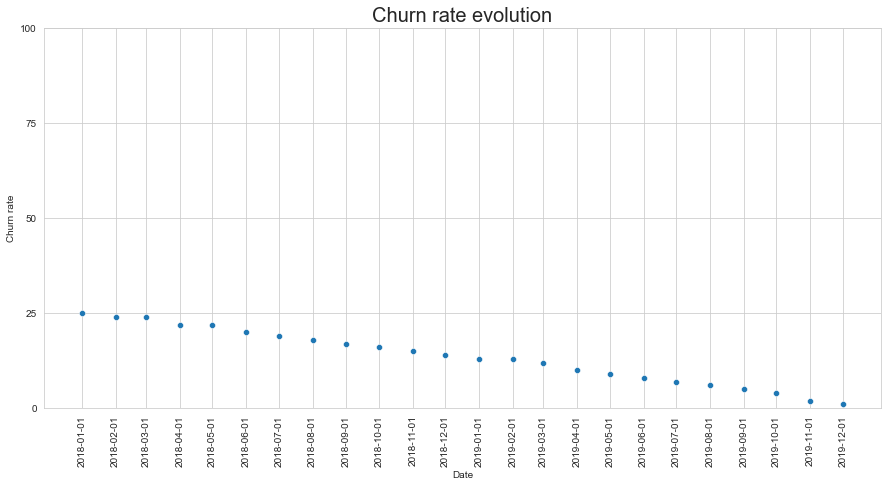

In [12]:
fig, axes = plt.subplots(figsize=(15,7))
sns.scatterplot(x="Date",y="Churn rate",data=churn_rate_evolution).set_title('Churn rate evolution', fontsize=20)
plt.xticks(churn_rate_evolution["Date"],rotation = 'vertical')
plt.yticks([0,25,50,75,100])
plt.ylim(0,100)
plt.show()

> 📌 It seems that on January 2018, the churn rate stands at 25%, before deacrease until reaching almost 0% by the end of 2019. The rate decreases on a linear way.

---

In [ ]:
df_new = pd.DataFrame(columns=["CE","CN",])
for year in [2018,2019]:
    for month in range(1,13):
        

In [39]:
first_customers = df.loc[(df.year_billing==2018)&(df.month_billing==1)]
first_customers = first_customer.newacct_no.unique()

In [41]:
df_new = df.loc[df.newacct_no.isin(first_customers)]

In [42]:
df_new

,newacct_no,line_stat,serv_code,tenure,effc_strt_date,effc_end_date,contract_month,ce_expiry,secured_revenue,bandwidth,term_reas_code,complaint_cnt,with_phone_service,churn,current_mth_churn,year_billing,month_billing
0,70068143.001.000000062,AC,VS100DUN,202,06.03.2018 00:00:00,05.03.2021 00:00:00,36.0,13.0,178.0,100M,NaN,0,N,N,N,2018,1
1,70068143.003.000072630,AC,VS030F6R,35,01.03.2019 00:00:00,28.02.2021 00:00:00,24.0,13.0,1572.0,30M,NaN,0,N,N,N,2018,1
2,70071840.001.000000066,AC,EAXMXMFSRN1,202,01.10.2019 00:00:00,30.09.2021 00:00:00,24.0,20.0,290.0,10M,NaN,0,Y,N,N,2018,1
3,70071840.003.000060034,AC,VS100DUN,72,07.11.2018 00:00:00,06.11.2020 00:00:00,24.0,9.0,218.0,100M,NaN,0,Y,N,N,2018,1
4,70076500.001.000000073,AC,PF100FSR,202,01.05.2017 00:00:00,30.04.2019 00:00:00,24.0,-9.0,430.0,100M (FTTO),NaN,0,N,Y,N,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505563,95538096.001.000087462,AC,VS100DUN,23,29.01.2020 00:00:00,28.01.2021 00:00:00,12.0,12.0,140.0,100M,NaN,0,N,N,N,2019,12
505575,95538237.001.000087466,AC,VS100FSN,23,30.01.2018 00:00:00,29.01.2020 00:00:00,24.0,0.0,198.0,100M,NaN,0,N,N,N,2019,12
505593,95540035.001.000087523,AC,VS100DUN,23,31.01.2020 00:00:00,30.01.2022 00:00:00,24.0,24.0,140.0,100M,NaN,0,N,N,N,2019,12
505594,95540043.001.000087524,AC,VS100FSR,23,15.04.2019 00:00:00,14.04.2021 00:00:00,24.0,14.0,198.0,100M,NaN,0,N,N,N,2019,12


In [85]:
churn_rate_evolution = [(str(month)+'-'+str(year), len(df_new.loc[(df_new.year_billing==year)&(df_new.month_billing==month)&(df_new.churn=='Y')])) for year in range(2018,2020) for month in range(1,13)]
churn_rate_evolution = pd.DataFrame(churn_rate_evolution, columns =['Date', 'Churns'])
churn_rate_evolution["Date"] = pd.to_datetime(churn_rate_evolution["Date"])

In [86]:
churn_rate_evolution

,Date,Churns
0,2018-01-01,5026
1,2018-02-01,4793
2,2018-03-01,4718
3,2018-04-01,4448
4,2018-05-01,4286
5,2018-06-01,4005
6,2018-07-01,3782
7,2018-08-01,3543
8,2018-09-01,3332
9,2018-10-01,3167


In [93]:
cum_churn = []
sum = 0
for i in range(0,24):
    sum+=churn_rate_evolution["Churns"][i]
    cum_churn.append(sum)

In [102]:
churn_rate_evolution["Cum churn"] = cum_churn
churn_rate_evolution["Cum churn percentage"] = 100-churn_rate_evolution["Cum churn"]/len(df_new.loc[(df_new.year_billing==2018)&(df_new.month_billing==1)])

In [103]:
churn_rate_evolution

,Date,Churns,Cum churn,Cum churn percentage
0,2018-01-01,5026,5026,99.749414
1,2018-02-01,4793,9819,99.510445
2,2018-03-01,4718,14537,99.275216
3,2018-04-01,4448,18985,99.053448
4,2018-05-01,4286,23271,98.839757
5,2018-06-01,4005,27276,98.640076
6,2018-07-01,3782,31058,98.451513
7,2018-08-01,3543,34601,98.274867
8,2018-09-01,3332,37933,98.108740
9,2018-10-01,3167,41100,97.950840


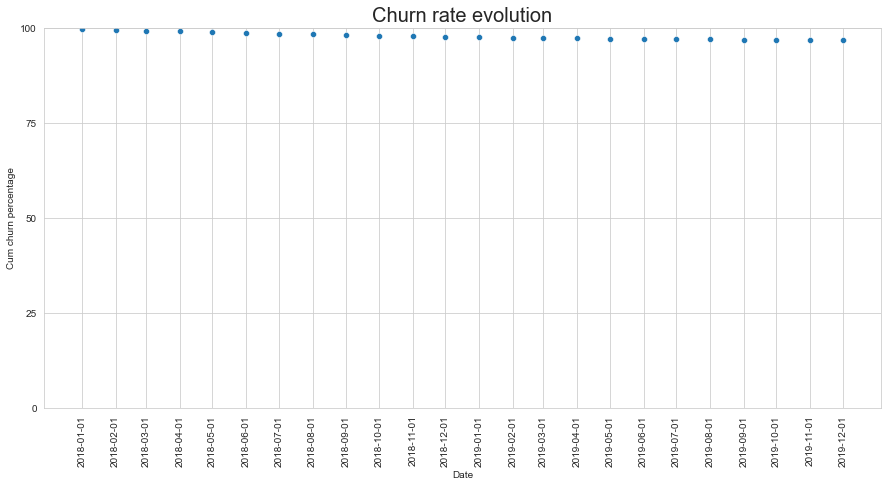

In [105]:
fig, axes = plt.subplots(figsize=(15,7))
sns.scatterplot(x="Date",y="Cum churn percentage",data=churn_rate_evolution).set_title('Churn rate evolution', fontsize=20)
plt.xticks(churn_rate_evolution["Date"],rotation = 'vertical')
plt.yticks([0,25,50,75,100])
plt.ylim(0,100)
plt.show()

### How much time does a custumer wait before churning?

### What kind of contracts know more churn?

### Does the contract expiry date influence churn?

### How is the churn rate affected by the monthly revenue of customers?

### How churn vary with the number of complaint calls done by customer every month?

### Does the bandwith of a customer affect churn?

In [20]:
df[df.churn == ].tenure

Series([], Name: tenure, dtype: int64)

(-50.0, 10000.0)

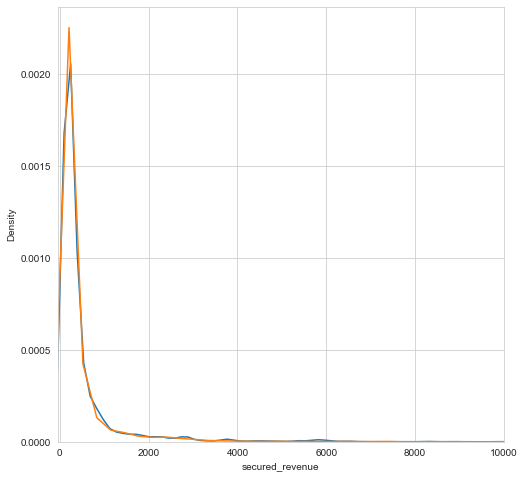

In [27]:
plt.figure(figsize=(8,8))
sns.kdeplot(df[df.churn == 'Y'].secured_revenue,label='Churn')
sns.kdeplot(df[df.churn == 'N'].secured_revenue,label='Not Churn')
plt.xlim(-50,10000)

### Does churn change whether broadband customer has taken a phone service seaprately or not?